##### Extra 2: Include an export of any modelling you have completed in a method that could be re-used by another program without re-training if applicable.

In [31]:
import joblib
import numpy as np

# Note: We already saved models in Step 1 of learning, we have two trained models in models directory

# Load the KNN model
# knn_model = joblib.load('../models/knn_machine1_model.pkl')  
knn_model = joblib.load('../models/knn_machine2_model.pkl')  

# Ensure the input shape matches the training features (input_1, input_2, input_3)
new_data = np.array([[27.5, 8.5, 881], [15, 12, 550]])  # where new_data is your input for prediction

# Perform inference
predictions = knn_model.predict(new_data)

# Display predictions
print(f"Predicted Power Values: {predictions}")


Predicted Power Values: [126.99942907 132.99158226]


/Users/shivampratapsingh/Documents/python_code_dir/assignment/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


##### Extra 3: Provide a method for a user to be able to run your solution with configurable machines running, input_1 and input_2 values and target GPH.

In [32]:
def run_model_with_custom_inputs(machine_type, input1, input2, gph):
    if machine_type == 1:
        model_path = '../models/knn_machine1_model.pkl'
    elif machine_type == 2:
        model_path = '../models/knn_machine2_model.pkl'
    else:
        raise ValueError("Invalid machine type. Choose 1 or 2.")

    model = joblib.load(model_path)
    predicted_power = model.predict([[input1, input2, gph]])[0]
    return predicted_power

# Dummy Data
machine_type = 1 # or 2
input1 = 30
input2 = 10
gph = 250

power_output = run_model_with_custom_inputs(machine_type, input1, input2, gph)
print(f"Predicted Power: {power_output}")


Predicted Power: 70.83547735253892


/Users/shivampratapsingh/Documents/python_code_dir/assignment/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


##### Extra 4: provide multiple different approaches to modelling with a comparison of the various models.

####        Machine 1

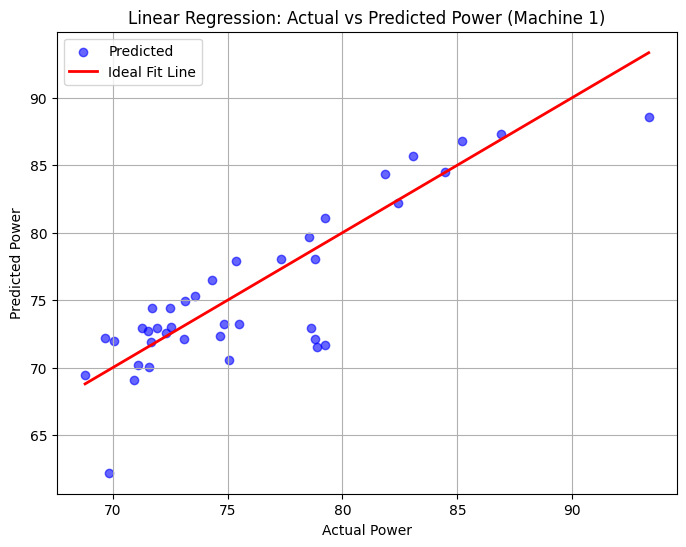

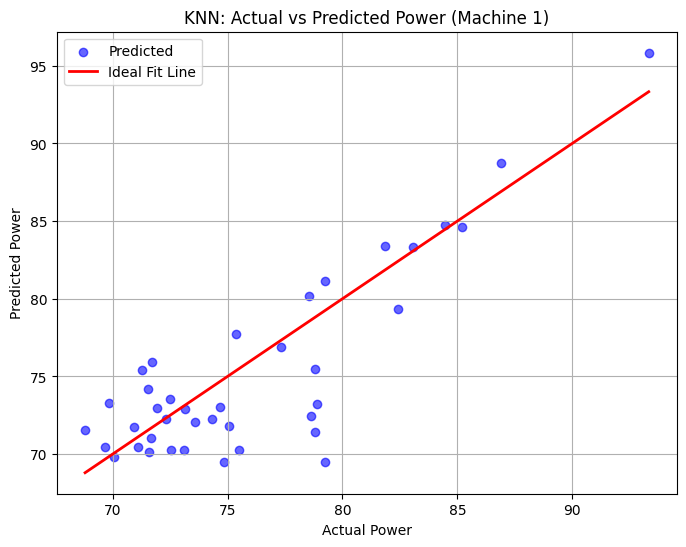

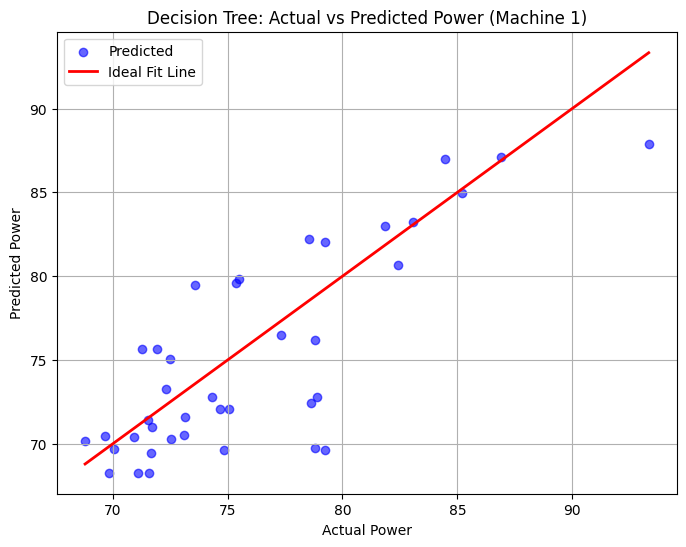

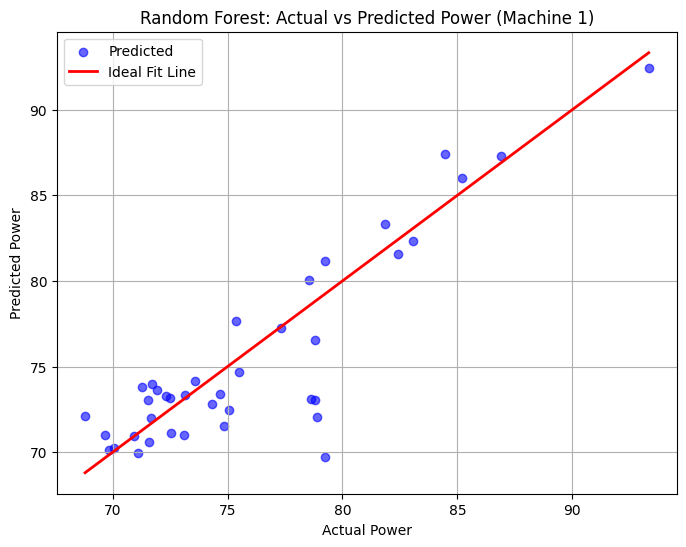

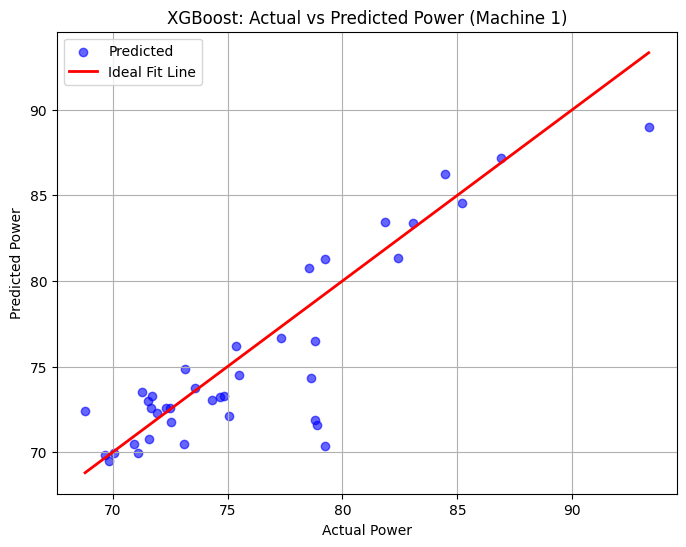

Linear Regression Metrics for Machine 1:
 RMSE: 3.11
 MAE: 2.31
 R²: 0.68

KNN Metrics for Machine 1:
 RMSE: 3.29
 MAE: 2.49
 R²: 0.64

Decision Tree Metrics for Machine 1:
 RMSE: 3.65
 MAE: 2.84
 R²: 0.55

Random Forest Metrics for Machine 1:
 RMSE: 2.74
 MAE: 1.91
 R²: 0.75

XGBoost Metrics for Machine 1:
 RMSE: 2.73
 MAE: 1.85
 R²: 0.75



In [33]:
# Machine 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the dataset
machine1_data = pd.read_csv('../data/machine1.csv')

# Filter valid data points
filtered_data = machine1_data[(machine1_data['check'] >= 90) & (machine1_data['check'] <= 110)]

# Prepare features and target
X = filtered_data[['input_1', 'input_2', 'input_3']]
y = filtered_data['power']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8)

# Model definitions
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=2, weights='distance'),  # Updated KNN parameters
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=20),  # Reduced for small dataset
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=20)  # Reduced for small dataset
}

# Model evaluation and metrics collection
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    
    # Plot: Actual vs Predicted Power
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predicted', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit Line')
    plt.xlabel('Actual Power')
    plt.ylabel('Predicted Power')
    plt.title(f'{name}: Actual vs Predicted Power (Machine 1)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} Metrics for Machine 1:\n RMSE: {metrics['RMSE']:.2f}\n MAE: {metrics['MAE']:.2f}\n R²: {metrics['R²']:.2f}\n")


### Machine 2

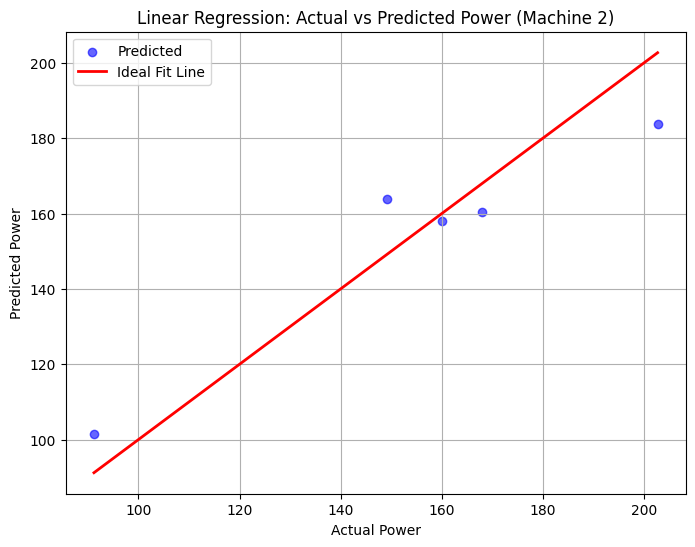

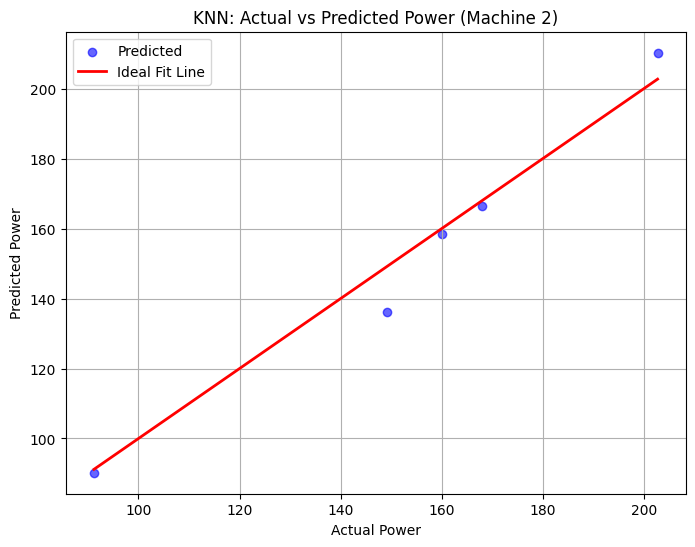

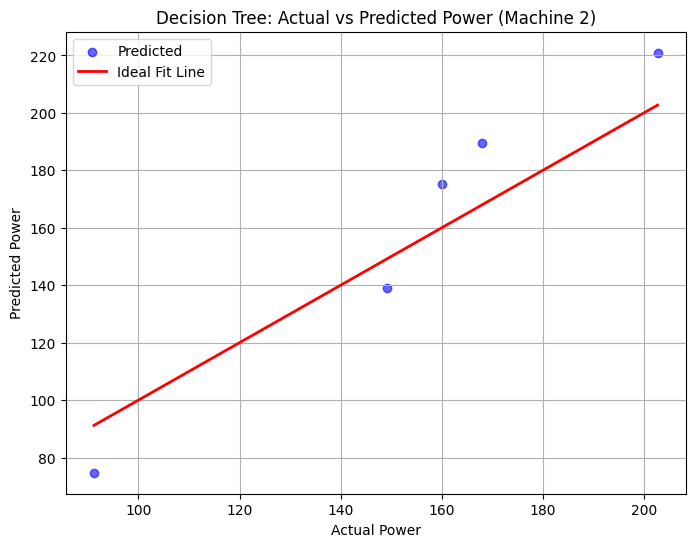

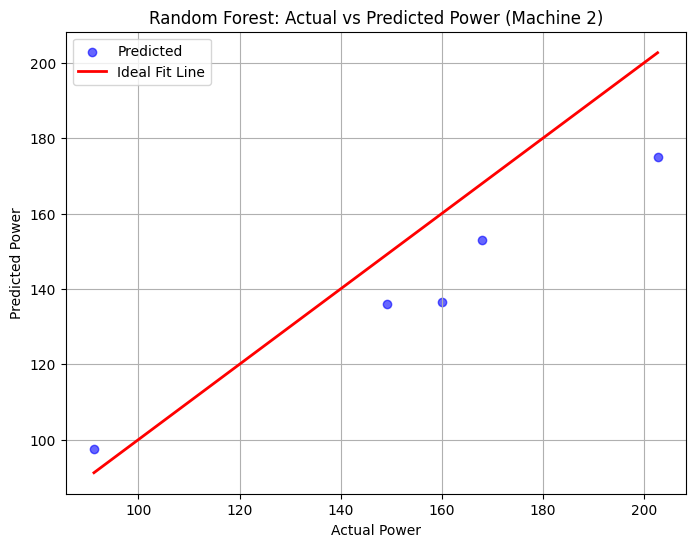

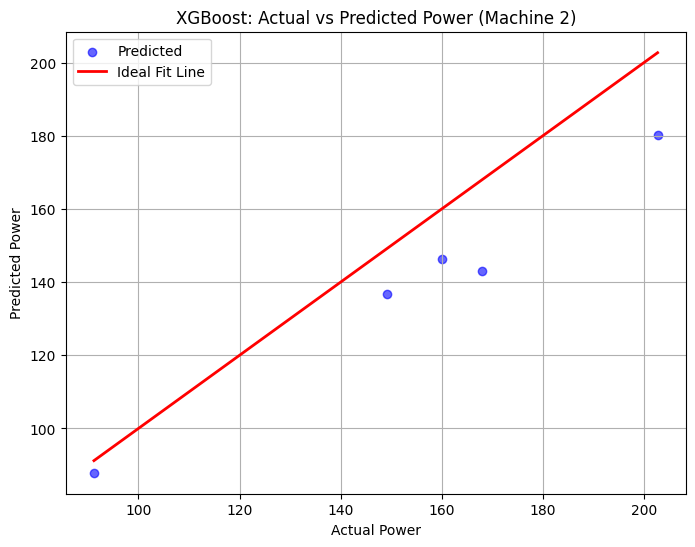

Linear Regression Metrics for Machine 2:
 RMSE: 12.16
 MAE: 10.67
 R²: 0.89

KNN Metrics for Machine 2:
 RMSE: 6.85
 MAE: 4.97
 R²: 0.96

Decision Tree Metrics for Machine 2:
 RMSE: 16.72
 MAE: 16.30
 R²: 0.79

Random Forest Metrics for Machine 2:
 RMSE: 18.78
 MAE: 17.15
 R²: 0.73

XGBoost Metrics for Machine 2:
 RMSE: 17.27
 MAE: 15.42
 R²: 0.77



In [34]:
# Machine 2

# Load the dataset
machine2_data = pd.read_csv('../data/machine2.csv')

# Filter valid data points
filtered_data = machine2_data[(machine2_data['check'] >= 90) & (machine2_data['check'] <= 110)]

# Prepare features and target
X = filtered_data[['input_1', 'input_2', 'input_3']]
y = filtered_data['power']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8)

# Model definitions
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=2, weights='distance'),  # Updated KNN parameters
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=10),  # Reduced for small dataset
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10)  # Reduced for small dataset
}

# Model evaluation and metrics collection
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate metrics
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    
    # Plot: Actual vs Predicted Power
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predicted', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal Fit Line')
    plt.xlabel('Actual Power')
    plt.ylabel('Predicted Power')
    plt.title(f'{name}: Actual vs Predicted Power (Machine 2)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} Metrics for Machine 2:\n RMSE: {metrics['RMSE']:.2f}\n MAE: {metrics['MAE']:.2f}\n R²: {metrics['R²']:.2f}\n")
